In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [3]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [4]:
#df.columns
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

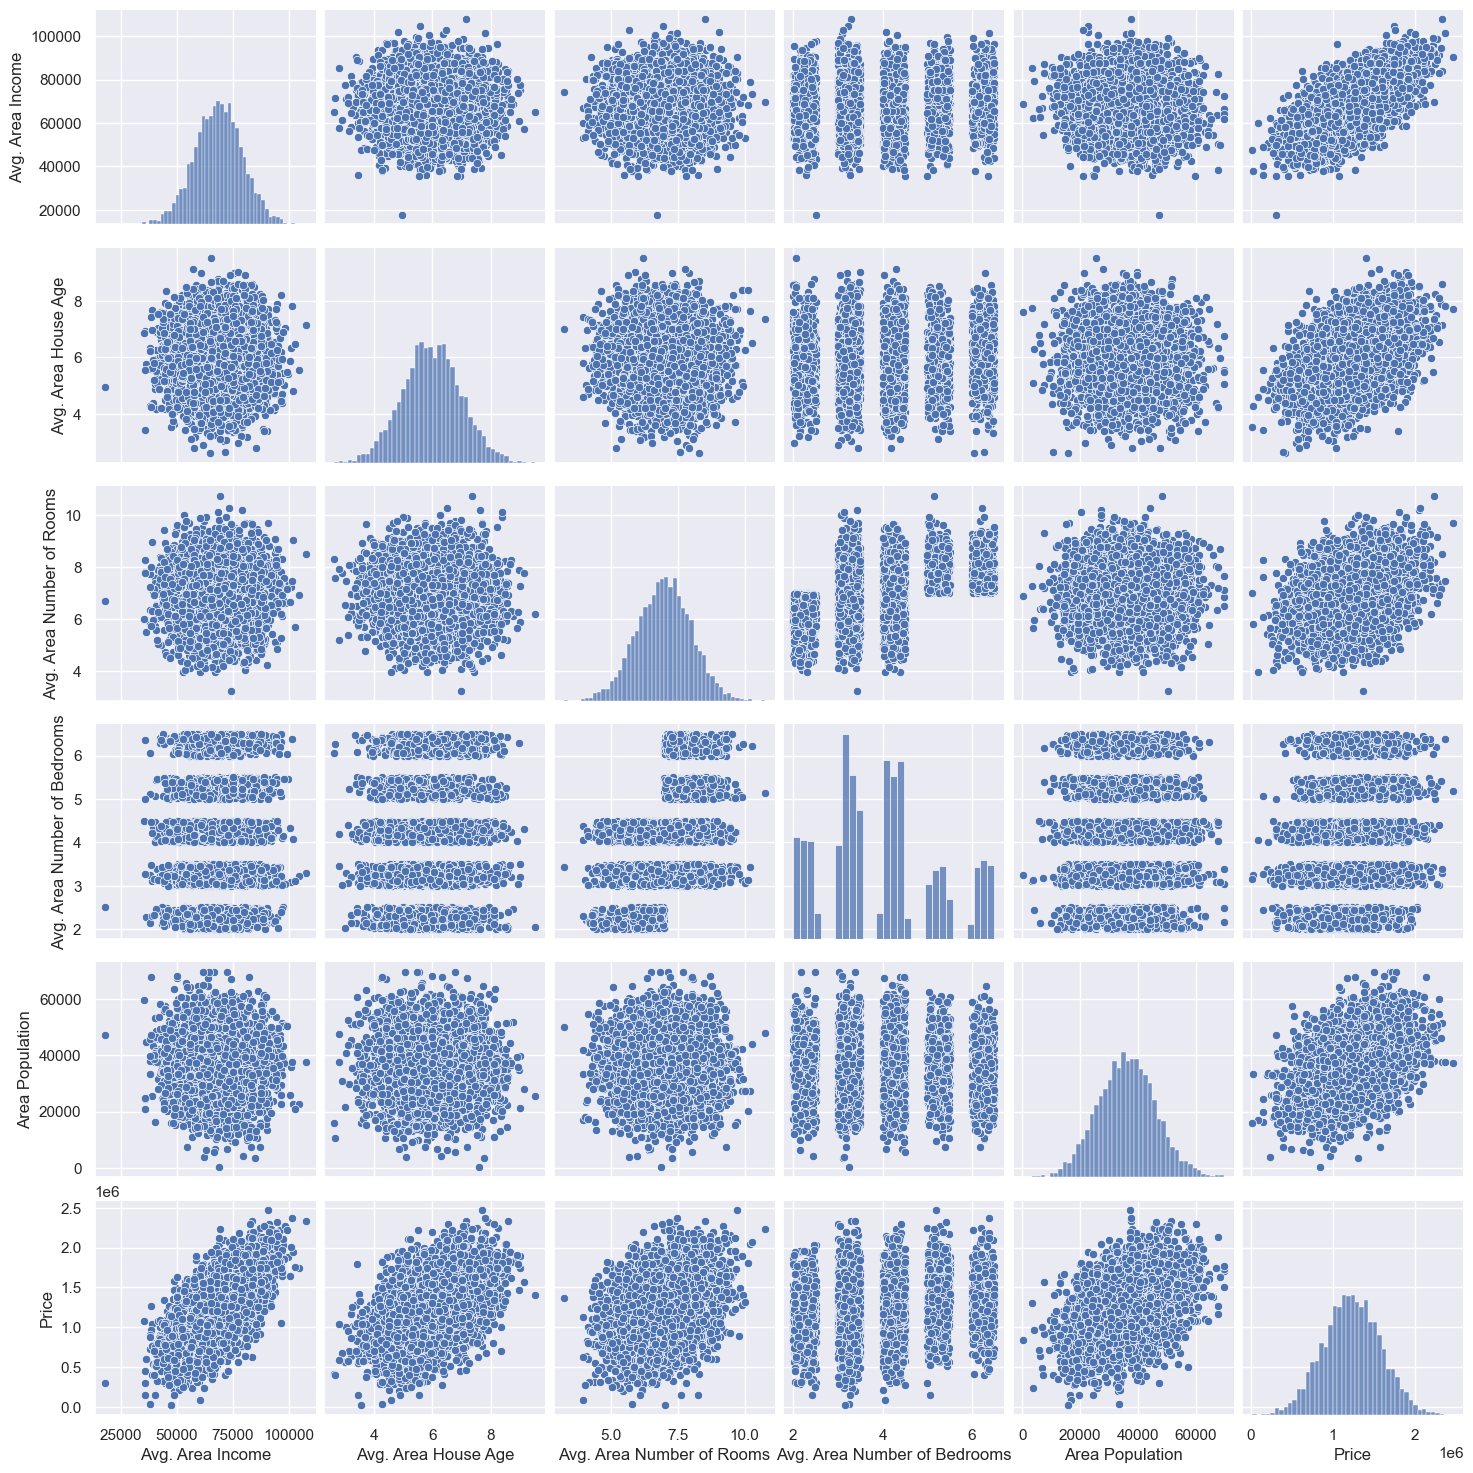

In [5]:
sns.pairplot(df)

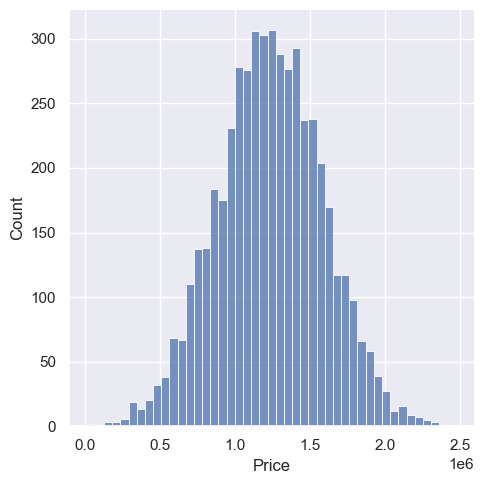

In [6]:
sns.displot(df['Price'])

<Axes: >

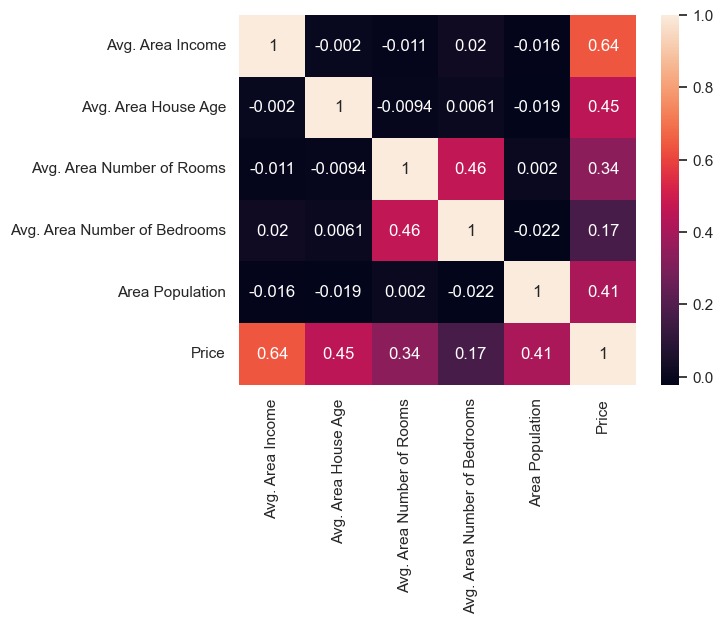

In [7]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.intercept_)
print(lm.coef_)

-2642239.2512346935
[2.15704132e+01 1.66552478e+05 1.19512534e+05 2.75895188e+03
 1.52968610e+01]


In [9]:
pd.DataFrame(lm.coef_, X.columns, columns=['Coef'])

,Coef
Avg. Area Income,21.570413
Avg. Area House Age,166552.477670
Avg. Area Number of Rooms,119512.534382
Avg. Area Number of Bedrooms,2758.951878
Area Population,15.296861


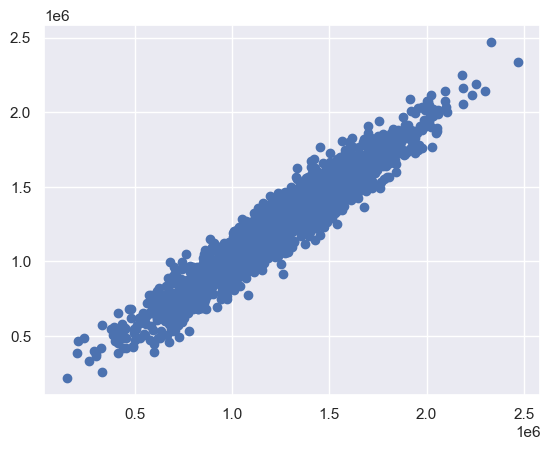

In [10]:
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)

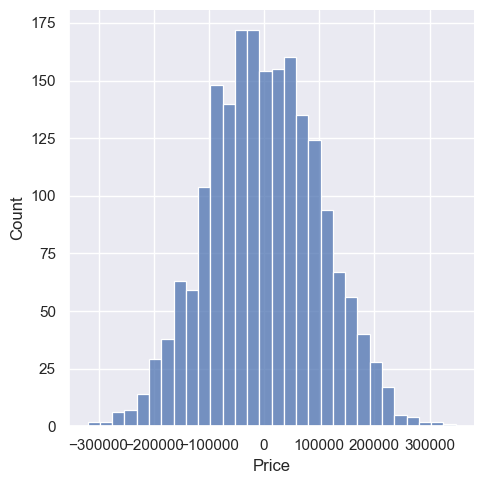

In [11]:
sns.displot(y_test - predictions) # if it is normally distributed it is good

In [12]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, predictions)) # mae
print(metrics.mean_squared_error(y_test, predictions)) # mse
print(np.sqrt(metrics.mean_squared_error(y_test, predictions))) # rmse

81331.22699573652
10119734875.653336
100596.89297216557


In [13]:
metrics.explained_variance_score(y_test, predictions)

0.9164509881327879

In [14]:
titanic_train = pd.read_csv('titanic_train.csv')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

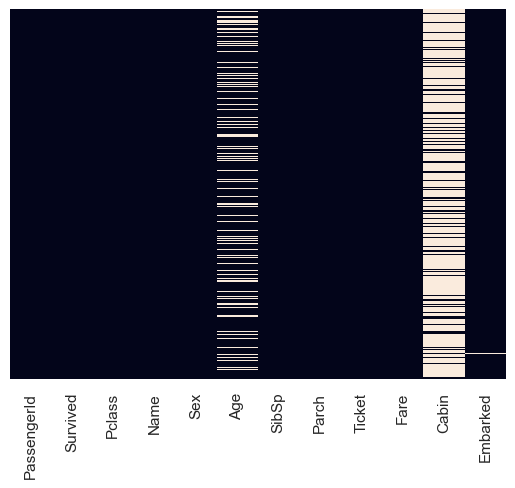

In [15]:
sns.heatmap(titanic_train.isnull(), yticklabels=False, cbar=False)

<Axes: xlabel='Survived', ylabel='count'>

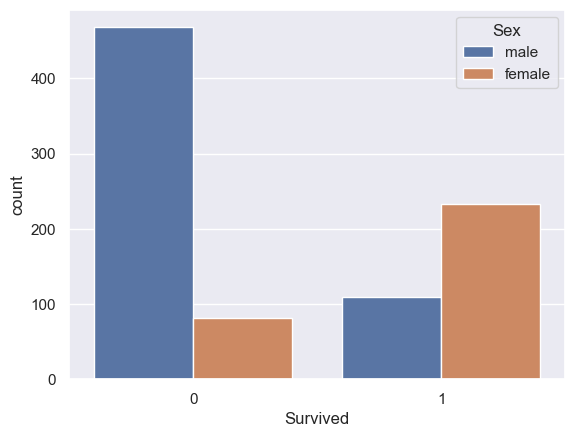

In [16]:
sns.countplot(x='Survived', data=titanic_train, hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

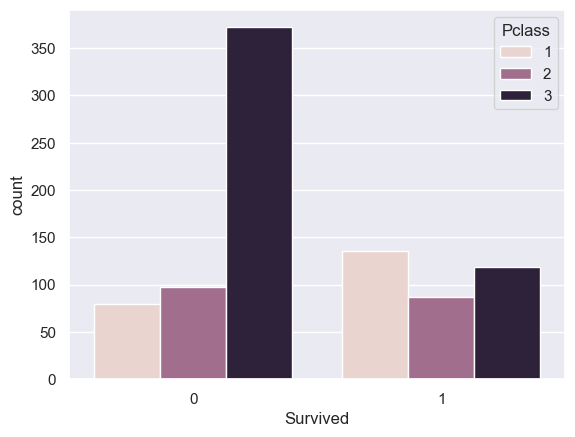

In [17]:
sns.countplot(x='Survived', data=titanic_train, hue='Pclass') # passenger class

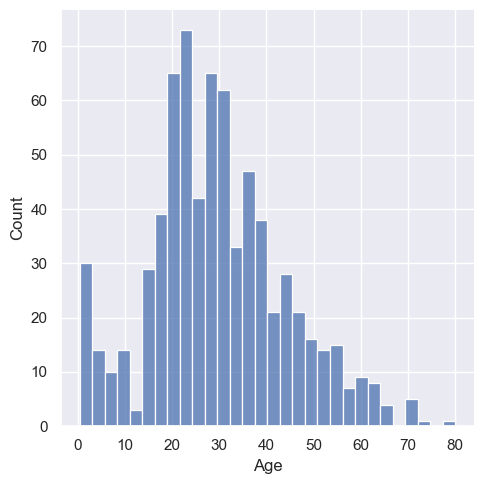

In [18]:
sns.displot(titanic_train['Age'].dropna(), kde=False, bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

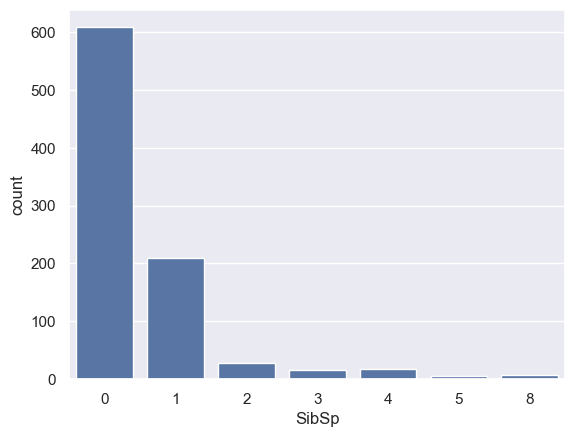

In [19]:
sns.countplot(x='SibSp', data=titanic_train) # sibling / spouse

<Axes: >

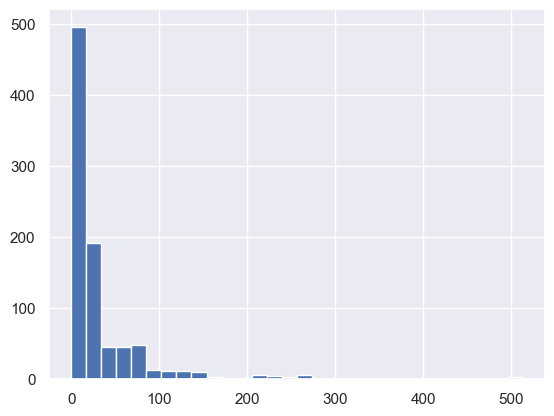

In [20]:
titanic_train['Fare'].hist(bins=30)

<Axes: xlabel='Pclass', ylabel='Age'>

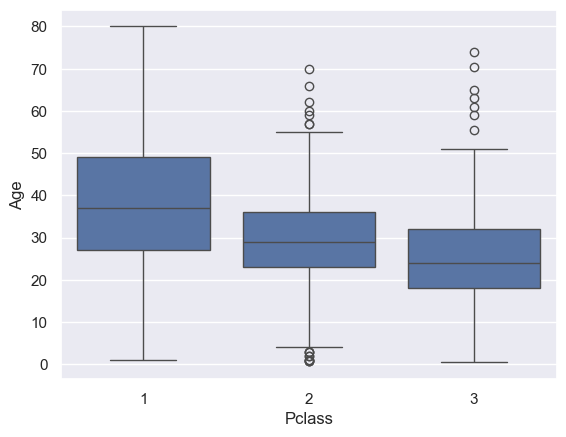

In [21]:
sns.boxplot(x='Pclass', y='Age', data=titanic_train)

/var/folders/_b/d7jmbvqd7mb62q71b1079s340000gn/T/ipykernel_4539/722907066.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/var/folders/_b/d7jmbvqd7mb62q71b1079s340000gn/T/ipykernel_4539/722907066.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

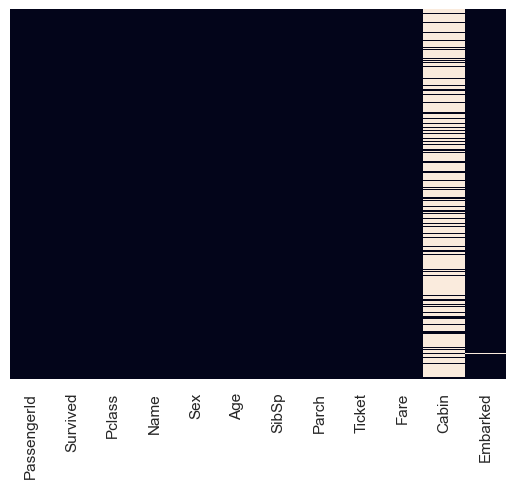

In [22]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
titanic_train['Age'] = titanic_train[['Age', 'Pclass']].apply(impute_age, axis=1)
sns.heatmap(titanic_train.isnull(), yticklabels=False, cbar=False)

<Axes: >

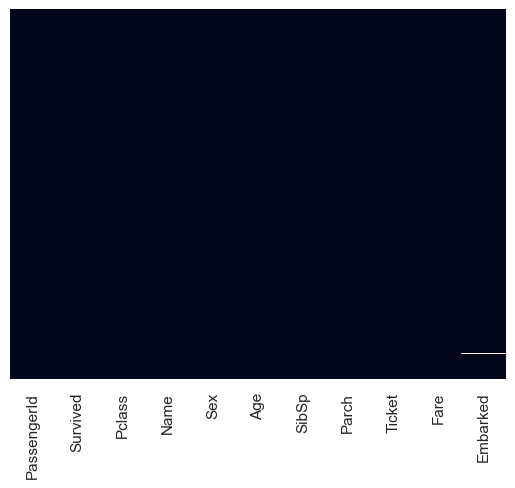

In [23]:
titanic_train.drop('Cabin', axis=1, inplace=True)
sns.heatmap(titanic_train.isnull(), yticklabels=False, cbar=False)

<Axes: >

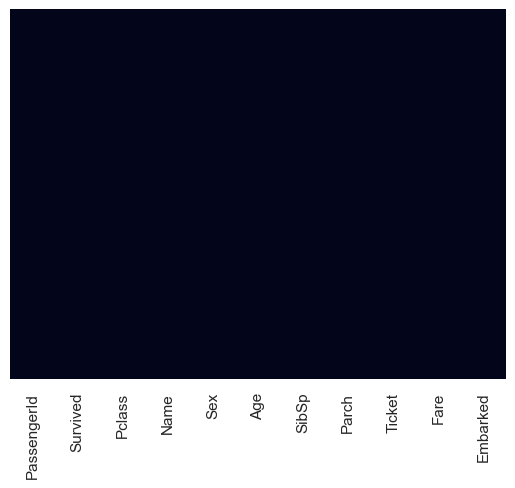

In [24]:
titanic_train.dropna(inplace=True)
sns.heatmap(titanic_train.isnull(), yticklabels=False, cbar=False)

In [25]:
sex = pd.get_dummies(titanic_train['Sex'], drop_first=True) # multi collinearity
sex.head()

,male
0,True
1,False
2,False
3,False
4,True


In [26]:
embarked = pd.get_dummies(titanic_train['Embarked'], drop_first=True)
embarked.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [27]:
titanic_train = pd.concat([titanic_train, sex, embarked], axis=1)
titanic_train.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
titanic_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [28]:
titanic_train.tail()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,0,2,27.0,0,0,13.00,True,False,True
887,1,1,19.0,0,0,30.00,False,False,True
888,0,3,24.0,1,2,23.45,False,False,True
889,1,1,26.0,0,0,30.00,True,False,False
890,0,3,32.0,0,0,7.75,True,True,False


In [29]:
X = titanic_train.drop('Survived', axis=1)
y = titanic_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train, y_train)
prediction = lm.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       109
           1       0.71      0.78      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.80      0.79      0.79       178



/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, prediction))

[[87 22]
 [15 54]]
